In [53]:
import pandas as pd
df = pd.read_csv('US.csv', skiprows=3)

In [54]:
df.head()

,Company_number,year,month,day,1_month,3_month,6_month,12_month,24_month,36_month,60_month
0,9361,1996,9,30,0.000022,0.000071,0.000155,0.000358,0.000905,0.001657,0.004068
1,9361,1996,10,25,0.000027,0.000085,0.000183,0.000421,0.001053,0.001910,0.004621
2,9361,1996,11,29,0.000016,0.000052,0.000112,0.000257,0.000648,0.001200,0.003110
3,9361,1996,12,20,0.000014,0.000044,0.000095,0.000218,0.000548,0.001016,0.002648
4,9361,1997,1,28,0.000013,0.000040,0.000086,0.000195,0.000486,0.000897,0.002347


In [55]:
y = df.loc[(df['Company_number'] == 9361) & (df['year'] == 1997) & (df['month'] == 3)]
y = y.iloc[:, 4:]
y = y.T.to_numpy().flatten()
y

array([1.400e-05, 4.400e-05, 9.300e-05, 2.060e-04, 5.000e-04, 9.080e-04,
       2.353e-03])

In [56]:
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
from matplotlib.pyplot import plot

def plot_nelson_siegel(y):
    """
    Plot nelson siegel curve for 1,3,6,12,24,36 and 60 month probability of default
    :param y: Numpy array of default probabilities 
    """
    t = np.array([1, 3, 6, 12, 24, 36, 60])
    assert len(y == len(t)), f"Length of y array not equal to {len(t)}"
    curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
    assert status.success
    plot(t, curve(t))

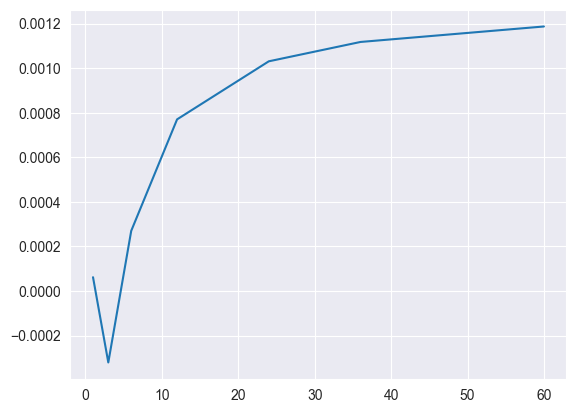

In [57]:
plot_nelson_siegel(y)